In [1]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


In [2]:
import pymysql
import pandas as pd
import numpy as np

# MySQL 데이터베이스 연결
connection = pymysql.connect(

)

try:
    # SQL 쿼리 실행 (예: 모든 데이터를 가져오는 쿼리)
    query = "SELECT * FROM tb_parking"

    # pandas의 read_sql을 사용하여 SQL 쿼리 결과를 DataFrame으로 변환
    df = pd.read_sql(query, connection)


finally:
    # 데이터베이스 연결 종료
    connection.close()

<ipython-input-2-1f67b5cf42f3>:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [3]:
df.drop(columns={'lat', 'lng', 'park_address', 'rates', 'time_rate', 'add_rates', 'day_maximum', 'fulltime_monthly', 'weekday_begin_time', 'weekday_end_time', 'weekend_begin_time', 'weekend_end_time', 'holiday_begin_time', 'holiday_end_time', 'park_phone'}, inplace=True)

In [4]:
x = ['양화3주차장[양화선착장앞]',
 '양화1주차장[당산철교 하부]',
 '양화2주차장[전망카페]',
 '신한드림리버오피스텔 주차장',
 '여의도한강3주차장(서강대교남단)',
 '여의도한강2주차장(마포대교남단)',
 '파크원 주차장',
 'IFC 서울 주차장',
 '아이엠(im)증권빌딩',
 '여의도한강4주차장(여의2교-하부파천교)',
 '당산2동(구)',
 '롯데마트맥스 영등포점',
 '당산노외 공영주차장(시)',
 '영등포제2스포츠센터',
 '코레일유통 본사 사옥 주차장',
 '당산근린공원 공영(구)',
 '여의도한강공원1주차장(63빌딩앞)',
 '씨티플라자 주차장',
 '앵커원',
 '여의도 사학연금(TP타워)',
 '영등포구청역 공영주차장(시)',
 '여의도한강5주차장(성모병원앞)',
 '금융투자협회',
 '신길환승(5호선)(구)',
 '영등포 롯데역사 주차장',
 '세미콜론문래',
 '영등포동제3공영(구)',
 '홈플러스 영등포점',
 '문래동공영(구)',
 '영등포본동제2공영(구)',
 '도림동 공영주차장(구)',
 '도림신협본점 옥외주차장',
 '대림운동장(구)',
 '대림1동공영(구)']

df = df[(df['park_name'].isin(x))]

In [5]:
df['available_parking_less_than_zero'] = df.groupby('park_name')['available_parking'].transform(lambda x: (x <= 0).sum())
df

<ipython-input-5-167786601433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['available_parking_less_than_zero'] = df.groupby('park_name')['available_parking'].transform(lambda x: (x <= 0).sum())


,park_name,park_type,capacity,que_status,cur_parking,cur_parking_time,available_parking,count,date,available_parking_less_than_zero
378,양화3주차장[양화선착장앞],BP,393,20분,167,2024-10-04 17:40:28,226,378,2024-10-04 17:41:24,46
387,양화1주차장[당산철교 하부],BP,88,20분,47,2024-10-04 17:40:51,41,387,2024-10-04 17:41:35,56
388,양화2주차장[전망카페],BP,20,20분,8,2024-10-04 17:40:58,12,388,2024-10-04 17:41:36,101
406,여의도한강2주차장(마포대교남단),BP,171,20분,194,2024-10-04 17:40:59,-23,406,2024-10-04 17:41:58,323
408,신한드림리버오피스텔 주차장,BS,232,20분,169,2024-10-04 17:41:08,63,408,2024-10-04 17:42:00,211
...,...,...,...,...,...,...,...,...,...,...
521505,영등포본동제2공영(구),NW,61,20분,59,2024-10-06 10:07:00,2,474,2024-10-06 10:07:52,124
521515,도림동 공영주차장(구),NW,26,20분,26,2024-10-06 10:07:22,0,484,2024-10-06 10:08:05,90
521520,도림신협본점 옥외주차장,BS,46,20분,9,2024-10-06 10:06:00,37,490,2024-10-06 10:08:11,0
521527,대림운동장(구),NW,192,20분,159,2024-10-06 10:07:26,33,497,2024-10-06 10:08:20,8


In [6]:
def round_minute(dt):
    minute = dt.minute
    if 0 <= minute < 20:
        return dt.replace(minute=0, second=0)
    elif 20 <= minute < 40:
        return dt.replace(minute=20, second=0)
    else:
        return dt.replace(minute=40, second=0)

# date 컬럼의 값을 datetime으로 변환
df.loc[:, 'date'] = pd.to_datetime(df['date'])
# date 컬럼에 함수 적용
df['date'] = df['date'].apply(round_minute)

# date 열을 기준으로 시간별로 정렬
df = df.sort_values(by='date')

df['cur_parking_new'] = np.nan
df['occupancy_rate'] = np.nan

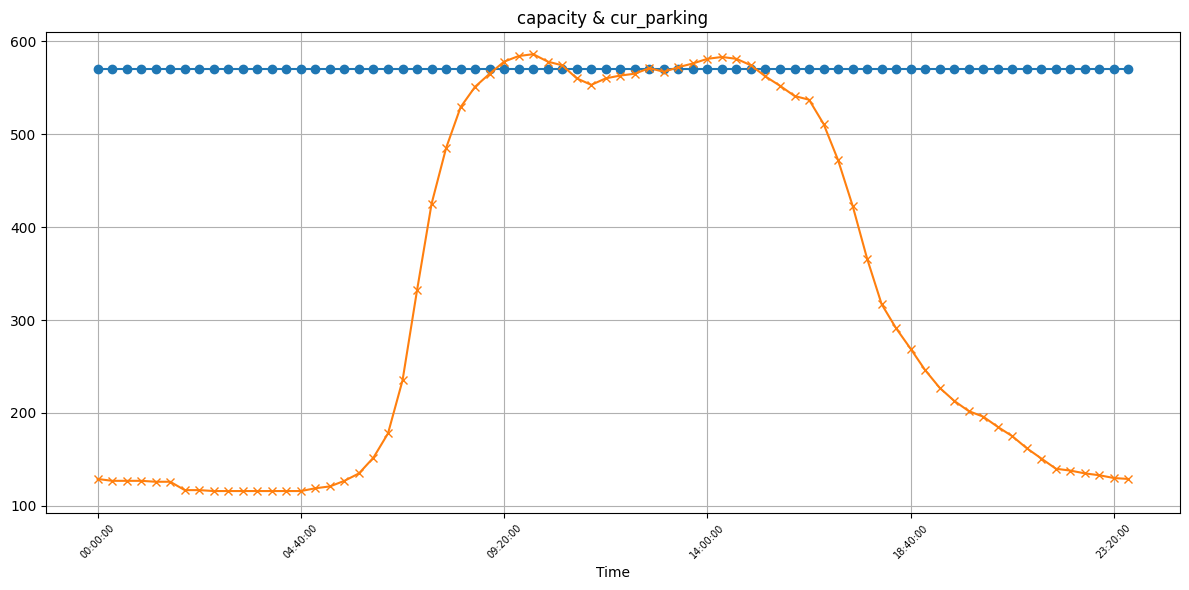

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 주차장 스케일링 데이터
df['date'] = pd.to_datetime(df['date'])
episode_data = df[df['park_name'] == '여의도 사학연금(TP타워)'].copy()

# 특정 날짜의 데이터 필터링
episode_data_1 = episode_data[episode_data['date'].dt.date == pd.to_datetime('2024-10-8').date()]

plt.figure(figsize=(12, 6))
plt.plot(episode_data_1['date'], episode_data_1['capacity'], marker='o', linestyle='-')
plt.plot(episode_data_1['date'], episode_data_1['cur_parking']-494, marker='x', linestyle='-')

num_ticks = len(episode_data_1) // 5
tick_positions = episode_data_1['date'].iloc[::num_ticks]

plt.xticks(ticks=tick_positions, labels=tick_positions.dt.strftime('%H:%M:%S'), rotation=45, fontsize=7)

plt.title('capacity & cur_parking')
plt.xlabel('Time')

plt.grid()
plt.tight_layout()
plt.show()


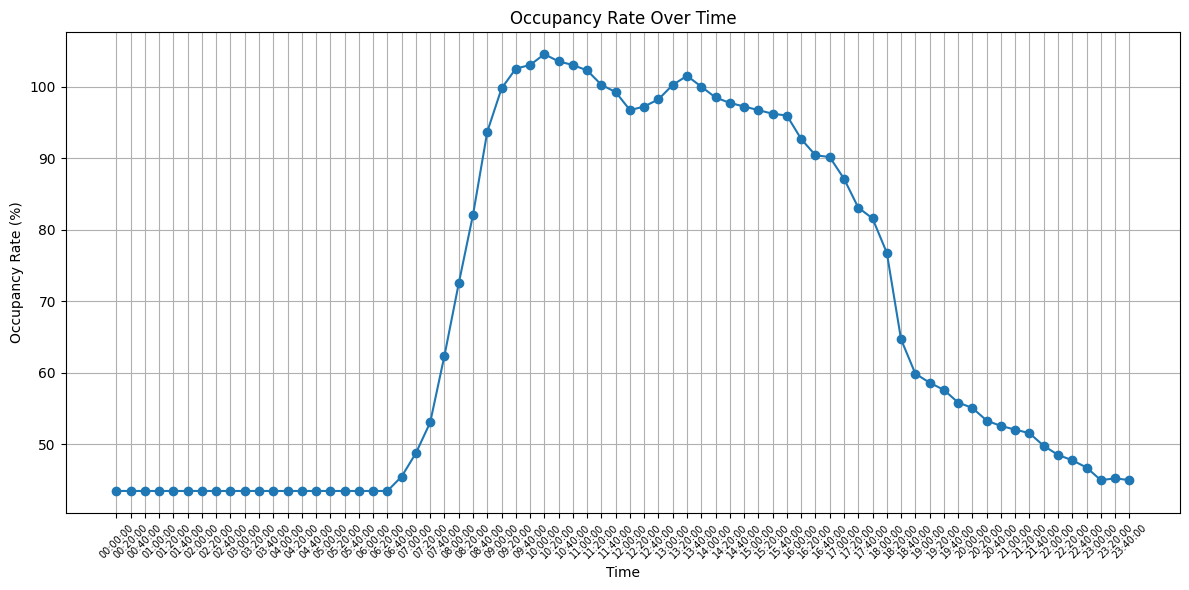

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 주차장 스케일링 데이터

# 유효한 데이터프레임에서 'date'를 DateTime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

episode_data = df[df['park_name'] == '코레일유통 본사 사옥 주차장'].copy()
episode_data_1 = episode_data[episode_data['date'].dt.date == pd.to_datetime('2024-10-07').date()]


# 시각화를 위한 데이터 준비
plt.figure(figsize=(12, 6))  # Figure size를 조정
plt.plot(episode_data_1['date'], episode_data_1['occupancy_rate'], marker='o', linestyle='-')

num_ticks = len(episode_data_1['date']) // 3  # 데이터가 3개당 하나씩 틱을 표시
tick_positions = episode_data_1['date'].iloc[::1]  # 3개마다 하나씩 가져오기
plt.xticks(ticks=tick_positions, labels=tick_positions.dt.strftime('%H:%M:%S'), rotation=45, fontsize=7)

# 타이틀 및 레이블 설정
plt.title('Occupancy Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Occupancy Rate (%)')

plt.grid()
plt.tight_layout()
plt.show()

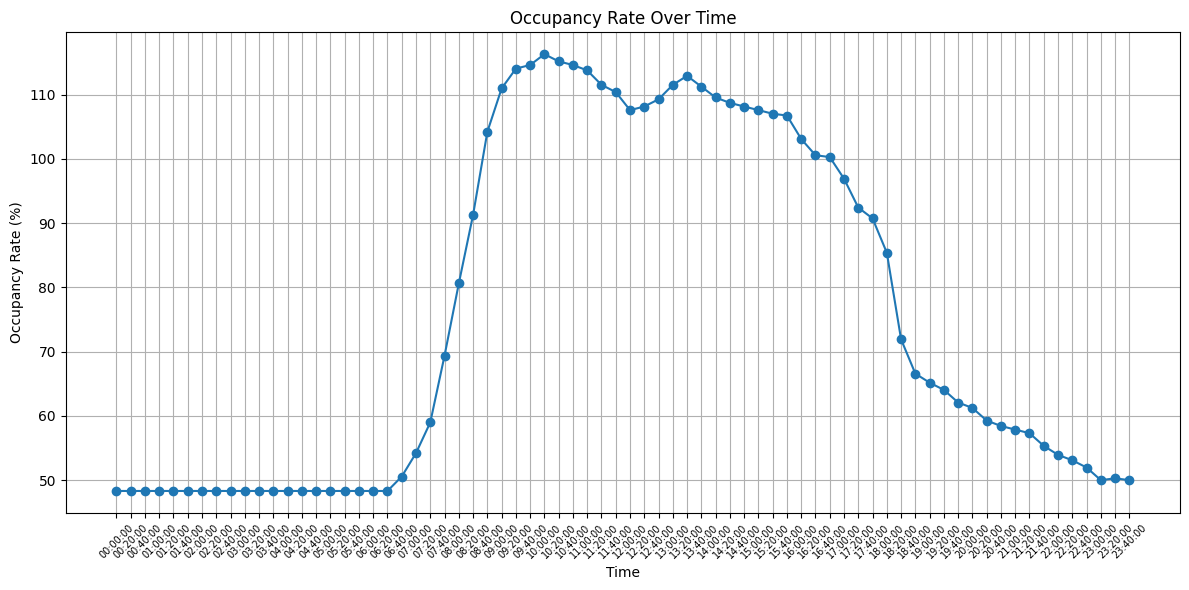

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 주차장 원본

# 유효한 데이터프레임에서 'date'를 DateTime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

episode_data = df[df['park_name'] == '코레일유통 본사 사옥 주차장'].copy()
episode_data = episode_data[episode_data['date'].dt.date == pd.to_datetime('2024-10-07').date()]

# 점유율 계산 (cur_parking/capacity * 100)
episode_data['occupancy_rate'] = ((episode_data['cur_parking']) / (episode_data['capacity'])) * 100


# 시각화를 위한 데이터 준비
plt.figure(figsize=(12, 6))  # Figure size를 조정
plt.plot(episode_data['date'], episode_data['occupancy_rate'], marker='o', linestyle='-')

num_ticks = len(episode_data['date']) // 3  # 데이터가 3개당 하나씩 틱을 표시
tick_positions = episode_data['date'].iloc[::1]  # 3개마다 하나씩 가져오기
plt.xticks(ticks=tick_positions, labels=tick_positions.dt.strftime('%H:%M:%S'), rotation=45, fontsize=7)

# 타이틀 및 레이블 설정
plt.title('Occupancy Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Occupancy Rate (%)')

plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# 유효한 데이터프레임에서 'date'를 DateTime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])
for park in x:

    episode_data = df[df['park_name'] == park].copy()

    # 여의도 사학연금(TP타워)일 때 cur_parking 값에서 494 차감
    if park == '여의도 사학연금(TP타워)':
        episode_data['cur_parking'] = episode_data['cur_parking'] - 494
        episode_data['available_parking'] = episode_data['available_parking'] + 494

    # 코레일유통 본사 사옥 주차장일 때 capacity 및 available_parking 값을 증가
    if park == '코레일유통 본사 사옥 주차장':
        episode_data['capacity'] = episode_data['capacity'] + 40
        episode_data['available_parking'] = episode_data['available_parking'] + 40

    # 당산근린공원 공영(구)일 때 capacity 차감 및 available_parking 값을 증가
    if park == '당산근린공원 공영(구)':
        episode_data['cur_parking'] = episode_data['cur_parking'] - 43
        episode_data['available_parking'] = episode_data['available_parking'] + 43


    episode_data = episode_data.reset_index(drop=True)

    # 점유율 계산 (cur_parking/capacity * 100)
    episode_data['occupancy_rate'] = ((episode_data['cur_parking']) / (episode_data['capacity'])) * 100

    episode_data['occupancy_rate_cleaned'] = episode_data['occupancy_rate'].replace(100, np.nan).interpolate()
    episode_data['occupancy_rate_cleaned'] = episode_data['occupancy_rate_cleaned'].replace(0, np.nan).interpolate()

    episode_data['change'] = episode_data['occupancy_rate_cleaned'].diff()

    max_change_row = episode_data.loc[episode_data['change'].abs().idxmax()]
    max_change_value = abs(max_change_row['change'])
    episode_data.drop(columns={'change'}, inplace=True)
    episode_data['change'] = episode_data['occupancy_rate'].diff()

    for i in range(1, len(episode_data)):
        if (episode_data.loc[i, 'occupancy_rate'] == 100) | (episode_data.loc[i, 'occupancy_rate'] == 0):
            if episode_data.loc[i, 'que_status'] == "2시간":
                episode_data.loc[i, 'occupancy_rate'] = np.nan

            if (abs(episode_data.loc[i, 'change']) > max_change_value) | (pd.isna(episode_data.loc[(i-1), 'occupancy_rate'])):
                episode_data.loc[i, 'occupancy_rate'] = np.nan

    episode_data['occupancy_rate'] = episode_data['occupancy_rate'].interpolate()
    episode_data['cur_parking_new'] = episode_data['occupancy_rate'] * episode_data['capacity'] / 100

    # 원래 df에 전처리된 데이터 병합 (cur_parking, available_parking, capacity, cur_parking_new, occupancy_rate)
    temp_df = episode_data[['park_name', 'date', 'cur_parking', 'available_parking', 'capacity', 'cur_parking_new', 'occupancy_rate']]
    for index, row in temp_df.iterrows():
        mask = (df['park_name'] == row['park_name']) & (df['date'] == row['date'])
        df.loc[mask, 'cur_parking'] = row['cur_parking']
        df.loc[mask, 'available_parking'] = row['available_parking']
        df.loc[mask, 'capacity'] = row['capacity']
        df.loc[mask, 'cur_parking_new'] = row['cur_parking_new']
        df.loc[mask, 'occupancy_rate'] = row['occupancy_rate']

# 정제된 df를 csv로 저장
df.to_csv('parking_lots.csv', index=False, encoding='utf-8-sig')


In [ ]:
df_park = pd.read_csv('parking_lots.csv')
df_park.head()

In [19]:
df_park[df_park['park_name'] == "코레일유통 본사 사옥 주차장"]

,park_name,park_type,capacity,que_status,cur_parking,cur_parking_time,available_parking,count,date,available_parking_less_than_zero,cur_parking_new,occupancy_rate
17,코레일유통 본사 사옥 주차장,BS,396,20분,323,2024-10-02 16:30:08,73,427,2024-10-02 16:20:00,71,323.0,81.565657
55,코레일유통 본사 사옥 주차장,BS,396,20분,324,2024-10-02 16:54:32,72,427,2024-10-02 16:40:00,71,324.0,81.818182
83,코레일유통 본사 사옥 주차장,BS,396,20분,312,2024-10-02 17:14:42,84,427,2024-10-02 17:00:00,71,312.0,78.787879
135,코레일유통 본사 사옥 주차장,BS,396,20분,298,2024-10-02 17:34:52,98,427,2024-10-02 17:20:00,71,298.0,75.252525
148,코레일유통 본사 사옥 주차장,BS,396,20분,287,2024-10-02 17:53:58,109,427,2024-10-02 17:40:00,71,287.0,72.474747
...,...,...,...,...,...,...,...,...,...,...,...,...
19601,코레일유통 본사 사옥 주차장,BS,396,20분,340,2024-10-10 16:57:00,56,427,2024-10-10 16:40:00,71,340.0,85.858586
19624,코레일유통 본사 사옥 주차장,BS,396,20분,327,2024-10-10 17:17:11,69,427,2024-10-10 17:00:00,71,327.0,82.575758
19674,코레일유통 본사 사옥 주차장,BS,396,20분,319,2024-10-10 17:37:21,77,427,2024-10-10 17:20:00,71,319.0,80.555556
19704,코레일유통 본사 사옥 주차장,BS,396,20분,309,2024-10-10 17:57:31,87,427,2024-10-10 17:40:00,71,309.0,78.030303
